<a href="https://colab.research.google.com/github/Mansi168/EV-Charging-Stations-Analysis/blob/main/EV_charging_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content.drive")

In [ ]:
path = "/content.drive/MyDrive/Assignment Data _ ElectricPe.xlsx"
df = pd.read_excel(path)

In [ ]:
print(df.head())

                              StationID                  Station_Name  \
0  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
1  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
2  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
3  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
4  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   

  Station_Type Station_Category Station_Access              ChargerID  \
0  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
1  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
2  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
3  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
4  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   

   Ping_Date  hour0  hour1  hour2  ...  hour14  hour15  hour16  hour17  \
0 2023-11-25   True   True   True  ...    True  

# Data Preparation and cleaning

In [ ]:
# check for missing values
print(df.isnull().sum())

StationID              0
Station_Name           0
Station_Type           0
Station_Category       0
Station_Access         0
ChargerID              0
Ping_Date              0
hour0                  0
hour1                  0
hour2                  0
hour3                  0
hour4                  0
hour5                  0
hour6                  0
hour7                  0
hour8                  0
hour9                  0
hour10                 0
hour11                 0
hour12                 0
hour13                 0
hour14                 0
hour15                 0
hour16                 0
hour17              3755
hour18              3755
hour19              3755
hour20              3755
hour21              3755
hour22              3755
hour23              3755
dtype: int64


In [ ]:
# Replace 'True' with 1, 'False' with 0, and fill missing values with 0
hourly_columns = ['hour0', 'hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23']
df[hourly_columns] = df[hourly_columns].replace({True: 1, False: 0}).fillna(0)

In [ ]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicates: 0


In [ ]:
# Convert date column to datetime format
df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])

In [ ]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
StationID           0
Station_Name        0
Station_Type        0
Station_Category    0
Station_Access      0
ChargerID           0
Ping_Date           0
hour0               0
hour1               0
hour2               0
hour3               0
hour4               0
hour5               0
hour6               0
hour7               0
hour8               0
hour9               0
hour10              0
hour11              0
hour12              0
hour13              0
hour14              0
hour15              0
hour16              0
hour17              0
hour18              0
hour19              0
hour20              0
hour21              0
hour22              0
hour23              0
dtype: int64


In [ ]:
print(df.dtypes)

StationID                   object
Station_Name                object
Station_Type                object
Station_Category            object
Station_Access              object
ChargerID                   object
Ping_Date           datetime64[ns]
hour0                        int64
hour1                        int64
hour2                        int64
hour3                        int64
hour4                        int64
hour5                        int64
hour6                        int64
hour7                        int64
hour8                        int64
hour9                        int64
hour10                       int64
hour11                       int64
hour12                       int64
hour13                       int64
hour14                       int64
hour15                       int64
hour16                       int64
hour17                     float64
hour18                     float64
hour19                     float64
hour20                     float64
hour21              

In [ ]:
# Convert float columns to int columns

float_columns = ['hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23']

df[float_columns] = df[float_columns].fillna(0).astype(int)

In [ ]:
print(df.dtypes)

StationID                   object
Station_Name                object
Station_Type                object
Station_Category            object
Station_Access              object
ChargerID                   object
Ping_Date           datetime64[ns]
hour0                        int64
hour1                        int64
hour2                        int64
hour3                        int64
hour4                        int64
hour5                        int64
hour6                        int64
hour7                        int64
hour8                        int64
hour9                        int64
hour10                       int64
hour11                       int64
hour12                       int64
hour13                       int64
hour14                       int64
hour15                       int64
hour16                       int64
hour17                       int64
hour18                       int64
hour19                       int64
hour20                       int64
hour21              

In [ ]:
print(df.head())

                              StationID                  Station_Name  \
0  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
1  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
2  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
3  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   
4  0124a793-6b67-4690-8348-54666a807fe7  SRI VARU CELESTIAL APARTMENT   

  Station_Type Station_Category Station_Access              ChargerID  \
0  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
1  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
2  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
3  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   
4  RESIDENTIAL            SMALL         PUBLIC  WA000822LAC1S009464-1   

   Ping_Date  hour0  hour1  hour2  ...  hour14  hour15  hour16  hour17  \
0 2023-11-25      1      1      1  ...       1  

# TASK-1
# Daily and hourly uptime analysis

# Calculate uptime per hour

In [ ]:
# Calculate total observations (assuming each row represents an observation)
total_observations = len(df)

In [ ]:
# Calculate uptime per hour
hourly_columns = ['hour0', 'hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23']

In [ ]:
uptime_per_hour = {}
for hour_column in hourly_columns:
    # Calculate total uptime hours for each hour
    uptime_hours = df[hour_column].sum()
    # Calculate uptime percentage
    uptime_percentage = (uptime_hours / total_observations) * 100
    uptime_per_hour[hour_column] = uptime_percentage

In [ ]:
print("Uptime percentage per hour:")
for hour, percentage in uptime_per_hour.items():
    print(f"Hour {hour[4:]}: {percentage:.2f}%")

Uptime percentage per hour:
Hour 0: 80.93%
Hour 1: 80.94%
Hour 2: 80.80%
Hour 3: 80.75%
Hour 4: 80.72%
Hour 5: 80.78%
Hour 6: 80.90%
Hour 7: 79.54%
Hour 8: 79.60%
Hour 9: 79.68%
Hour 10: 79.70%
Hour 11: 79.80%
Hour 12: 79.73%
Hour 13: 79.83%
Hour 14: 79.85%
Hour 15: 79.61%
Hour 16: 79.72%
Hour 17: 67.85%
Hour 18: 68.02%
Hour 19: 67.97%
Hour 20: 68.01%
Hour 21: 67.98%
Hour 22: 67.91%
Hour 23: 67.65%


# Calculate uptime per day

In [ ]:
# Group the data by 'Ping_Date' and sum the hourly columns
daily_uptime = df.groupby('Ping_Date')[hourly_columns].sum()

In [ ]:
# Calculate total observations (assuming each row represents an observation)
total_observations = len(df)

In [ ]:

# Calculate uptime per day
uptime_per_day = {}
for date, row in daily_uptime.iterrows():
    # Sum of uptime hours for each day
    uptime_hours = row.sum()
    # Calculate uptime percentage
    uptime_percentage = (uptime_hours / total_observations) * 100
    uptime_per_day[date] = uptime_percentage

In [ ]:
print("Uptime percentage per day:")
for date, percentage in uptime_per_day.items():
    print(f"{date}: {percentage:.2f}%")

Uptime percentage per day:
2023-11-25 00:00:00: 322.36%
2023-11-26 00:00:00: 322.89%
2023-11-27 00:00:00: 323.20%
2023-11-28 00:00:00: 321.97%
2023-11-29 00:00:00: 320.63%
2023-11-30 00:00:00: 227.22%


In [ ]:
# Specify the ChargerID for which you want to visualize hourly uptime
specific_charger_id = 'WA000822LAC1S009464-1'

In [ ]:
# Get the uptime percentages for the specific ChargerID
charger_uptime = [uptime_per_hour[column] for column in hourly_columns]

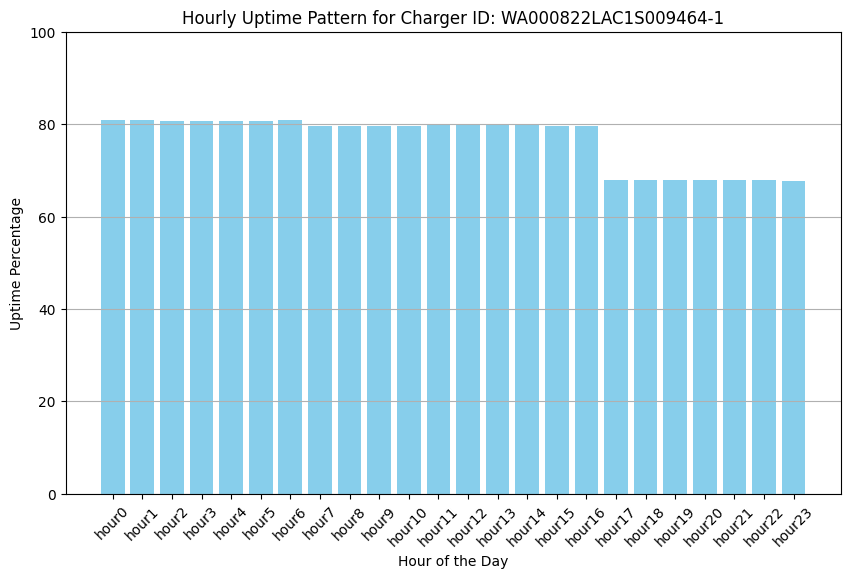

In [ ]:
# Create a bar plot for hourly uptime
plt.figure(figsize=(10, 6))
plt.bar(hourly_columns, charger_uptime, color='skyblue')
plt.title(f"Hourly Uptime Pattern for Charger ID: {specific_charger_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Uptime Percentage")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y')
plt.show()

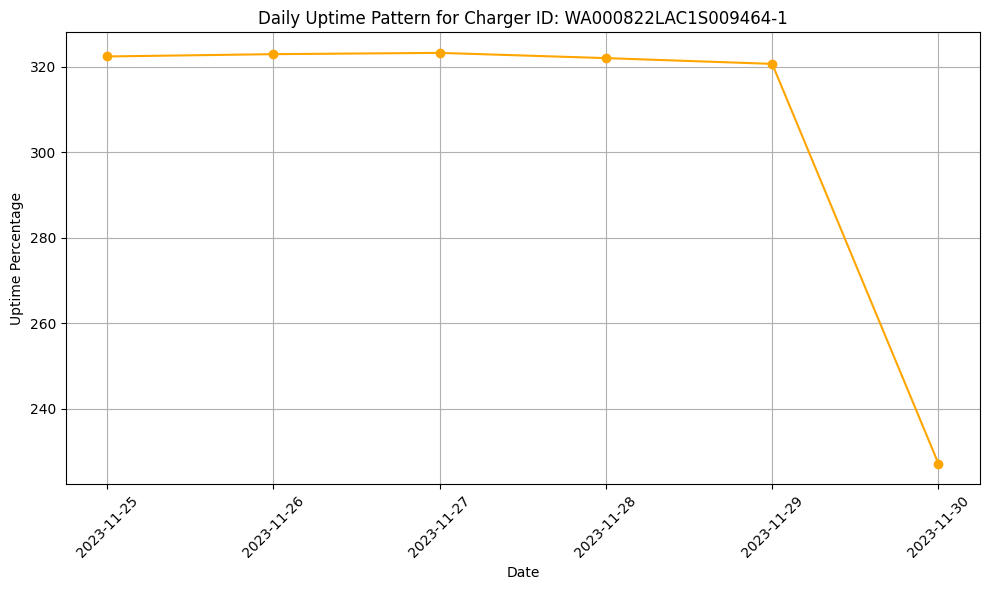

In [ ]:
# Filter the uptime percentages dictionary for the specific ChargerID
charger_uptime = {key: value for key, value in uptime_per_day.items() if df.loc[df['Ping_Date'] == key]['ChargerID'].values[0] == specific_charger_id}

# Sort the dictionary by keys (dates)
charger_uptime = dict(sorted(charger_uptime.items()))

# Create lists for dates and corresponding uptime percentages
dates = list(charger_uptime.keys())
uptime_percentages = list(charger_uptime.values())

# Create a line plot for daily uptime
plt.figure(figsize=(10, 6))
plt.plot(dates, uptime_percentages, marker='o', linestyle='-', color='orange')
plt.title(f"Daily Uptime Pattern for Charger ID: {specific_charger_id}")
plt.xlabel("Date")
plt.ylabel("Uptime Percentage")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# TASK-2
# Performance comparison of charger stations

In [ ]:
# Convert the dictionary to a DataFrame
uptime_df = pd.DataFrame(list(uptime_per_day.items()), columns=['Ping_Date', 'Uptime_Percentage'])

# Merge the calculated uptime percentages with the original DataFrame 'df' based on 'Ping_Date'
df = df.merge(uptime_df, on='Ping_Date', how='left')

# Calculate average daily uptime for each station
station_uptime = df.groupby('Station_Name')['Uptime_Percentage'].mean()



In [ ]:
# Sort stations by average uptime
station_uptime_sorted = station_uptime.sort_values(ascending=False)

<ipython-input-50-81e49c03d4f4>:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


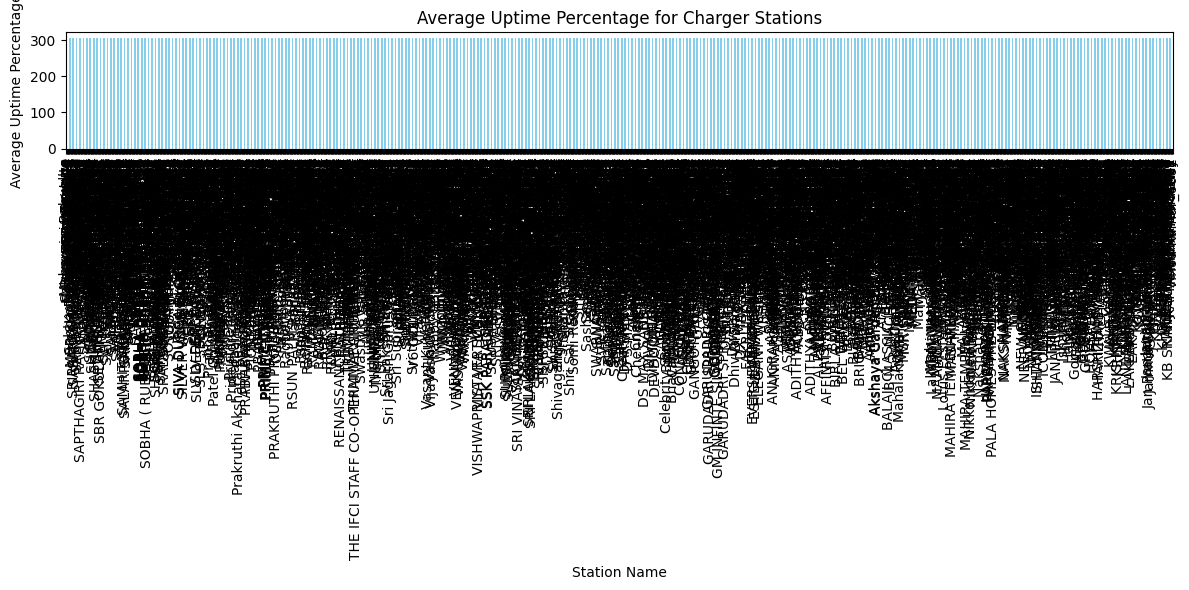

In [ ]:
# Plotting the average uptime for each station
plt.figure(figsize=(12, 6))
station_uptime_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Uptime Percentage for Charger Stations')
plt.xlabel('Station Name')
plt.ylabel('Average Uptime Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Identify stations with particularly high or low uptime
top_stations = station_uptime_sorted.head(5)  # Top performing stations
bottom_stations = station_uptime_sorted.tail(5)  # Poor performing stations

In [ ]:
print("Top performing stations:")
print(top_stations)

Top performing stations:
Station_Name
Mahaveer Rehyolite     306.377423
Salarpuria Anugraha    306.377423
Ramanuja Enclave       306.377423
Godrej icon            306.377423
MAHAVEER ORCHIDS       306.377423
Name: Uptime_Percentage, dtype: float64


In [ ]:
print("\nPoor performing stations:")
print(bottom_stations)


Poor performing stations:
Station_Name
KAMADHENU ENCLAVE    306.377423
K.S.R ENCLAVE        306.377423
K.N.R APARTMENT      306.377423
K m n residency      306.377423
vinod Kumar_6662     306.377423
Name: Uptime_Percentage, dtype: float64


# TASK-3
# Correlation with Station Characteristics:

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
encoded_columns = pd.get_dummies(df[['Station_Type', 'Station_Category', 'Station_Access']])


In [ ]:
# Concatenate the encoded columns with the uptime percentages
data_with_encoded = pd.concat([df['Uptime_Percentage'], encoded_columns], axis=1)

In [ ]:
# Calculate correlation matrix
correlation_matrix = data_with_encoded.corr()

In [ ]:
# Extract correlations with uptime percentages
uptime_correlation = correlation_matrix['Uptime_Percentage'].drop('Uptime_Percentage')

In [ ]:
# Display correlations
print("Correlation with Uptime_Percentage:")
print(uptime_correlation)

Correlation with Uptime_Percentage:
Station_Type_RESIDENTIAL                         NaN
Station_Category_APARTMENT              2.750693e-15
Station_Category_DIY                    6.368863e-16
Station_Category_INDEPENDENT           -3.887908e-17
Station_Category_INDEPENDENT_HOUSE      1.291169e-15
Station_Category_INDIVIDUAL_BUILDING   -1.129530e-17
Station_Category_L                     -3.009999e-16
Station_Category_LARGE                  1.816335e-15
Station_Category_MEDIUM                -2.404780e-15
Station_Category_OTHERS                 8.560985e-16
Station_Category_RESIDENTIAL            3.641410e-16
Station_Category_SMALL                 -1.205309e-15
Station_Access_PRIVATE                  7.955325e-16
Station_Access_PUBLIC                  -6.615520e-16
Station_Access_RESTRICTED              -2.100102e-16
Name: Uptime_Percentage, dtype: float64


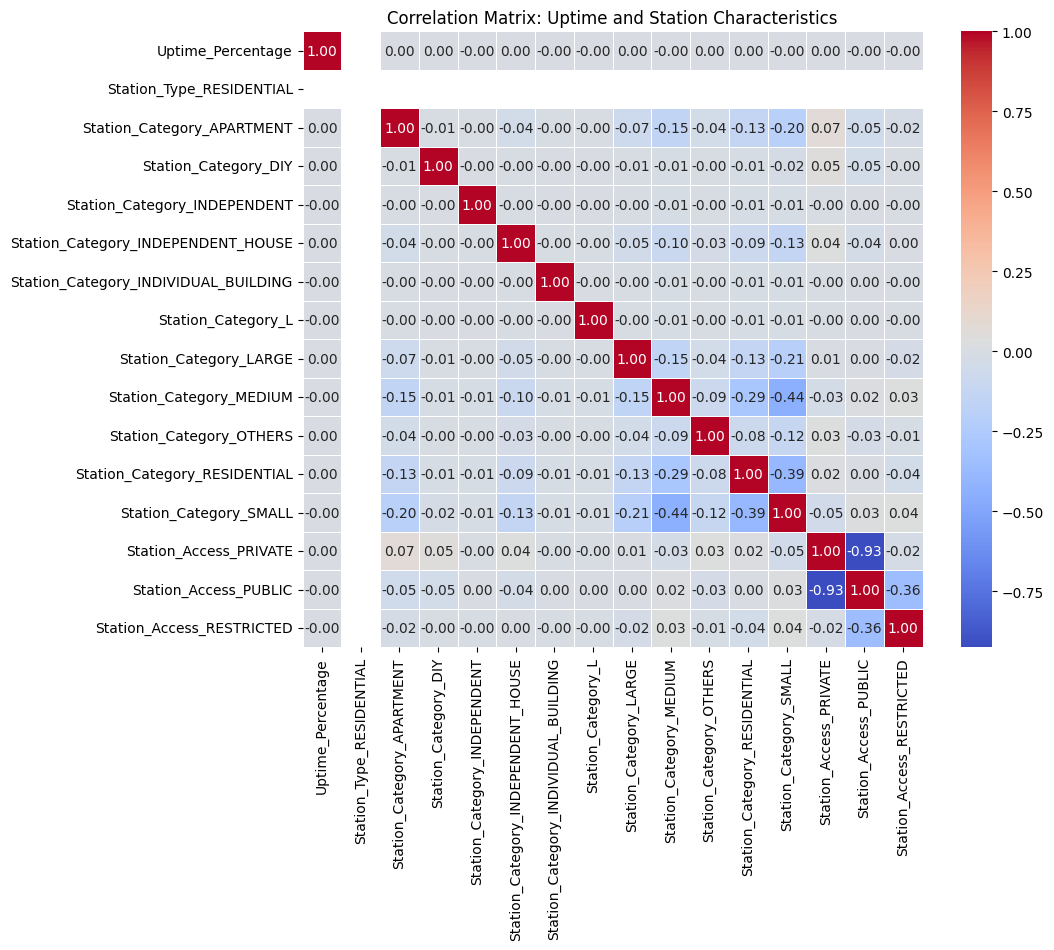

In [ ]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Uptime and Station Characteristics')
plt.show()

# TASK_4
# Predictive Analysis for Future Uptime:

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Select data for a specific charger station
selected_station_data = df[df['ChargerID'] == 'WA000822LAC1S009464-1']

In [ ]:
# Prepare data for Prophet
data_for_prophet = selected_station_data[['Ping_Date', 'Uptime_Percentage']]

# Rename columns for Prophet
data_for_prophet.columns = ['ds', 'y']

In [ ]:
# Initialize Prophet model
model = Prophet()

# model.fit(data_for_prophet)

In [ ]:
# Make future predictions for the next day
# future = model.make_future_dataframe(periods=1, freq='D')
# forecast = model.predict(future)

In [ ]:
# Display forecast for the next day
# forecast_next_day = forecast[['ds', 'yhat']].tail(1)
# print("Forecast for the next day:")
# print(forecast_next_day)

Forecast for the next day:
          ds        yhat
6 2023-12-01  257.927264


In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
# Splitting data into train and test sets
train_size = int(len(data_for_prophet) * 0.8)  # 80% train, 20% test
train_data = data_for_prophet[:train_size]
test_data = data_for_prophet[train_size:]

In [ ]:
# Fit the model on the training data
model.fit(data_for_prophet)

In [ ]:
# Forecast on the test set
forecast = model.predict(data_for_prophet)

forecast = forecast.rename(columns={'yhat': 'y'})

forecast['cutoff'] = forecast['ds']

In [105]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'y', 'cutoff'],
      dtype='object')


In [116]:
# # Model evaluation
# metrics_list = ['mae', 'mse', 'rmse', 'mape', 'coverage']
# performance_metrics_results = performance_metrics(forecast, metrics=metrics_list)
# print("Performance metrics:")
# print(performance_metrics_results)

# Example: 30 days forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Access predicted values ('yhat') and other forecast components
predicted_values = forecast['yhat']
print(predicted_values)

0     322.356723
1     322.893785
2     323.195604
3     321.970572
4     320.745539
5     319.520507
6     318.295474
7     317.070442
8     315.845409
9     314.620377
10    313.395344
11    312.170312
12    310.945279
13    309.720247
14    308.495214
15    307.270182
16    306.045149
17    304.820117
18    303.595084
19    302.370052
20    301.145019
21    299.919987
22    298.694954
23    297.469922
24    296.244889
25    295.019857
26    293.794824
27    292.569792
28    291.344759
29    290.119727
30    288.894694
31    287.669662
32    286.444629
33    285.219597
Name: yhat, dtype: float64


In [109]:
# Cross-validation
cv_results = cross_validation(model, horizon='0.5 days')
print("Cross-validation metrics:")
print(cv_results)

INFO:prophet:Making 2 forecasts with cutoffs between 2023-11-26 12:00:00 and 2023-11-27 12:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpch3iwpc1/4rzwohhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpch3iwpc1/r44ttlqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85730', 'data', 'file=/tmp/tmpch3iwpc1/4rzwohhy.json', 'init=/tmp/tmpch3iwpc1/r44ttlqm.json', 'output', 'file=/tmp/tmpch3iwpc1/prophet_modelfob0k9wf/prophet_model-20231202160518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpch3iwpc1/mn883ppc.json
DEBUG:cmdstanpy:input tempfile

Cross-validation metrics:
          ds        yhat  yhat_lower  yhat_upper           y  \
0 2023-11-27  323.431069  323.431067  323.431072  323.195739   
1 2023-11-28  323.497428  323.393735  323.615038  321.970706   

               cutoff  
0 2023-11-26 12:00:00  
1 2023-11-27 12:00:00  


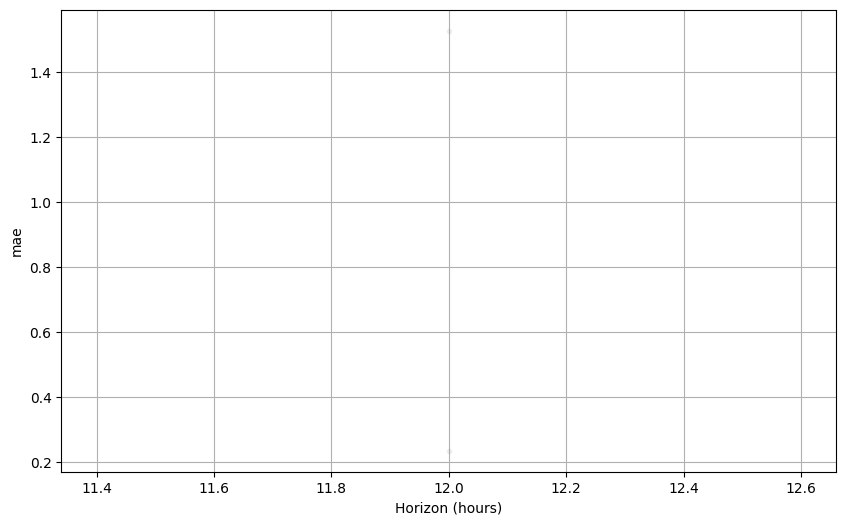

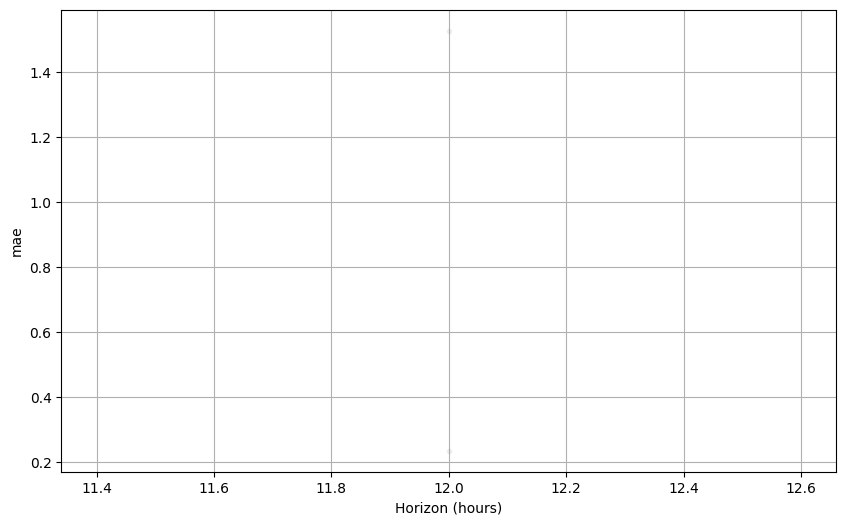

In [110]:
# Plot cross-validation metrics
plot_cross_validation_metric(cv_results, metric='mae')

# TASK_5
# Open-Ended Exploration:

In [ ]:
# Assuming 'weather_data' contains weather information with columns like 'Ping_Date', 'Temperature', 'Precipitation', 'Humidity', etc.

# Merge charger station uptime data with weather data based on 'Ping_Date'
merged_data = pd.merge(data_for_prophet, weather_data, on='Ping_Date', how='inner')

In [ ]:
# Calculate correlation matrix
correlation_matrix = merged_data.corr()
print(correlation_matrix)

In [ ]:
# Calculate correlation matrix
correlation_matrix = merged_data.corr()
print(correlation_matrix)

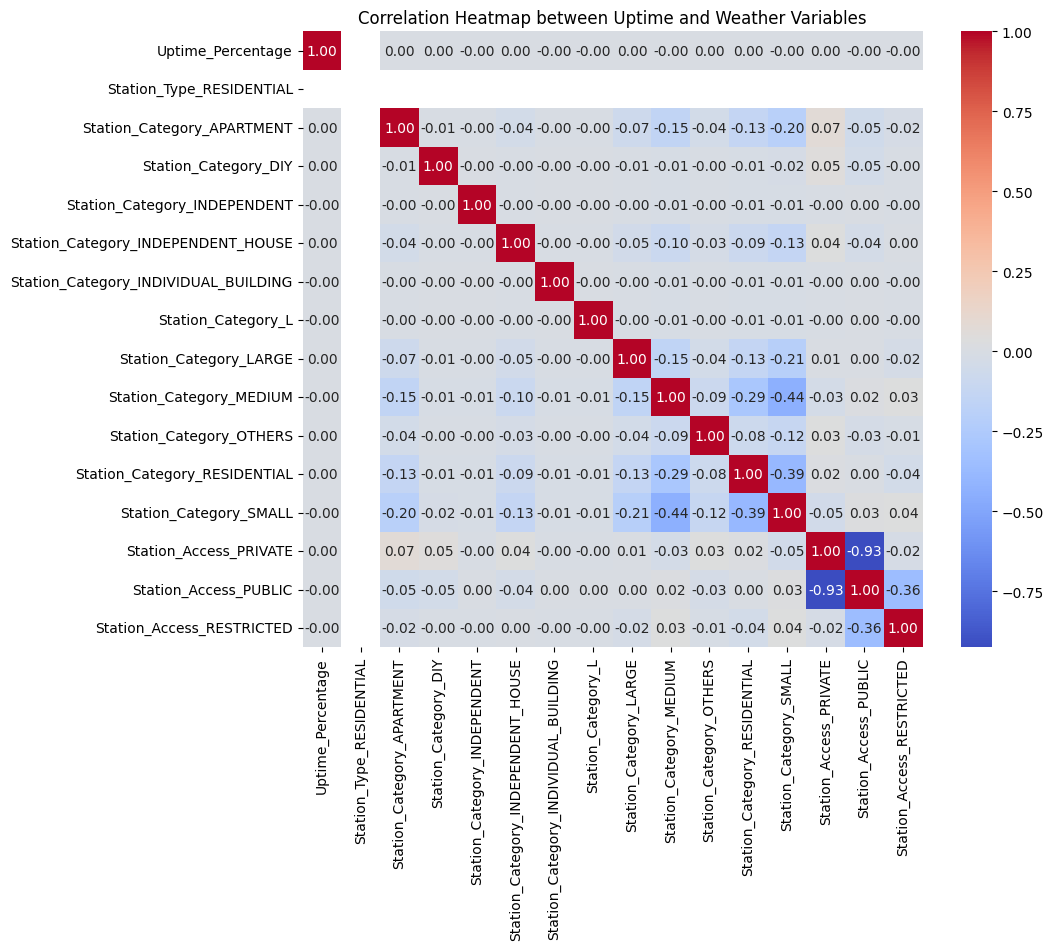

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Uptime and Weather Variables')
plt.show()